#  <span style="color:orange">Μάθημα Δυαδικής Ταξινόμησης (CLF101) - Επίπεδο Αρχάριων</span>

**Έγινε χρήση της βιβλιοθήκης: PyCaret 3.0** <br />
**Python Vesrion: 3.9** <br />
**Ημερομηνία τελευταίας τροποποίησης: 14 Αυγούστου 2022**


# 1.0 Στόχοι Μαθήματος

Καλώς ήρθατε στο μάθημα Δυαδικής Ταξινόμησης (CLF101) - Επίπεδο Αρχάριων. Ο οδηγός προορίζεται για τις νέες χρήστριες του PyCaret, οι οποίες ενδιαφέρονται να αξιοποιήσουν το Module `pycaret.classification` για να εκτελέσουν Δυαδική Ταξινόμηση:

Σε αυτό το μάθημα θα διδαχθούμε:

* **Λήψη Δεδομένων:** Πώς να εισάγουμε δεδομένα από το αποθετήριο της βιβλιοθήκης PyCaret.
* **Εγκατάσταση Περιβάλλοντος:** Πώς να στήνουμε μια πειραματική διαδικασία κάνοντας χρήση της PyCaret και πώς να χτίζουμε μοντέλα ταξινόμησης.
* **Δημιουργία Μοντέλου:** Πώς να δημιουργούμε ένα μοντέλο, να κάνουμε stratified cross validation (ΣτΜ: μέθοδος αξιολόγησης) και να αξιολογούμε τις μετρικές που χρησιμοποιούνται στην ταξινόμηση.
* **Ρύθμιση Μοντέλου:** Πώς να ρυθμίζουμε αυτόματα τις υπερ-παραμέτρους ενός μοντέλου ταξινόμησης.
* **Γραφική Απεικόνιση Μοντέλου:** Πώς να αναλύουμε την απόδοση ενός μοντέλου αξιοποιώντας διάφορες γραφικές απεικονίσεις.
* **Οριστικοποίηση Μοντέλου:** Πώς να οριστικοποιούμε το καλύτερο μοντέλο στο τέλος του πειράματος.
* **Πρόβλεψη Μοντέλου:** Πώς να κάνουμε προβλέψεις βασισμένες σε νέα / άγνωστα δεδομένα.
* **Αποθήκευση / Φόρτωση Μοντέλου:** Πώς να αποθηκεύουμε / φορτώνουμε ένα μοντέλο για μελλοντική χρήση.

Χρόνος Ανάγνωσης : Περίπου 30 Λεπτά.


# 1.1 Εγκατάσταση PyCaret
Το πρώτο βήμα για να χρησιμοποιήσουμε τη βιβλιοθήκη PyCaret είναι να την εγκαταστήσουμε. Η εγκατάσταση είναι εύκολη και θα διαρκέσει μόνο μερικά λεπτά. Ακολουθήστε τις παρακάτω οδηγίες:

# Εγκατάσταση PyCaret σε Τοπικό Jupyter Notebook.
`pip install pycaret`  <br />

# Εγκατάσταση PyCaret στο Google Colab η στο Azure Notebooks
`!pip install pycaret`


# 1.2 Προ-απαιτούμενα
- Python 3.6 ή πιο σύγχρονη (ΣτΜ: H Python 3.10 δεν υποστηρίζεται τη δεδομένη στιγμή).
- PyCaret 2.0 ή πιο σύγχρονη.
- Σύνδεση στο Internet, ώστε να φορτώσουμε δεδομένα από το αποθετήριο της PyCaret.
- Βασικές Γνώσεις πάνω στη Δυαδική Ταξινόμηση.

# 1.3 Για τους χρήστες του Google Colab:
Αν εκτελείτε αυτό το notebook στο Google Colab, «τρέξτε» το παρακάτω κομμάτι κώδικα στην αρχή του notebook, ώστε να προβάλλετε διαδραστικές εικόνες.<br/>

`from pycaret.utils import enable_colab` <br/>
`enable_colab()`


# 1.4 Δείτε επίσης:
- __[Μάθημα Δυαδικής Ταξινόμησης (CLF102) - Μέσο Επίπεδο](https://github.com/pycaret/pycaret/blob/master/tutorials/Greek/Binary%20Classification%20Tutorial%20Level%20Intermediate%20-%20CLF102.ipynb)__
- __[Μάθημα Δυαδικής Ταξινόμησης (CLF102) - Επίπεδο Προχωρημένων](https://github.com/pycaret/pycaret/blob/master/tutorials/Greek/Binary%20Classification%20Tutorial%20Level%Expert%20-%20CLF103.ipynb)__

# 2.0 Τι είναι η Δυαδική Ταξινόμηση;

Η δυαδική ταξινόμηση είναι μια τεχνική επιβλεπόμενης μηχανικής μάθησης. Στοχεύει στην πρόβλεψη διακριτών ετικετών (labels) κλάσεων, όπως για παράδειγμα: Επιτυχία/Αποτυχία (Pass/Fail), Θετικό/Αρνητικό κλπ. Ακολουθούν ορισμένα πραγματικά προβλήματα όπου επιστρατεύεται η ταξινόμηση.

- Ο ιατρικός έλεγχος ώστε να διαγνωστεί αν ένας ασθενής πάσχει από μία συγκεκριμένη ασθένεια. Η ιδιότητα που καλούμαστε να ταξινομήσουμε είναι η ύπαρξη ή μη της νόσου.
- Η μέθοδος καθορισμούς της "επιτυχίας ή αποτυχίας" σε ένα τεστ ή ο ποιοτικός έλεγχος σε εργοστάσια, π.χ. η απόφαση για το αν πληρούνται κάποιες προδιαγραφές ή όχι.
- Η ανάκτηση πληροφοριών, δηλαδή αν μια ιστοσελίδα ή ένα άρθρο πρέπει να συμπεριλαμβάνεται στα αποτελέσματα αναζήτησης ή όχι. Η ιδιότητα που καλούμαστε να ταξινομήσουμε είναι η συνάφεια του άρθρου ή η χρησιμότητα του για τη χρήστρια.

__[Περισσότερες πληροφορίες σχετικά με τη δυαδική αναζήτηση](https://medium.com/@categitau/in-one-of-my-previous-posts-i-introduced-machine-learning-and-talked-about-the-two-most-common-c1ac6e18df16)__

# 3.0 Επισκόπηση του Module Ταξινόμησης της PyCaret

Το Module της βιβλιοθήκης PyCaret που αφορά την ταξινόμηση (`pycaret.classification`) είναι ένα module επιβλεπόμενης μηχανικής μάθησης. Χρησιμοποιείται για την ταξινόμηση στοιχείων σε δύο ομάδες βάσει διάφορων τεχνικών και αλγορίθμων. Κάποια συνηθισμένα προβλήματα ταξινόμησης είναι η προεπιλογές πελατών (ναι ή όχι), η απώλεια πελάτη (θα μείνει ή θα φύγει) και η διάγνωση ασθένειας (θετικό ή αρνητικό).

Το module ταξινόμησης της PyCaret μπορεί να χρησιμοποιηθεί σε προβλήματα Δυαδικής (Binary) ταξινόμησης και ταξινόμησης Πολλαπλών Κλάσεων (Multi-class classification). Έχει περισσότερους απο 18 αλγορίθμους και 14 γραφικές απεικονίσεις για την ανάλυση της απόδοσης των μοντέλων. Το module ταξινόμησης της PyCaret τα έχει όλα, είτε πρόκειται για ρύθμιση υπερ-παραμέντρων (tuning hyper-parameters), είτε για ensembling (ΣτΜ: τεχνική συνδυασμού μεθόδων), είτε για πιο προηγμένες τεχνικές όπως stacking (ΣτΜ: ό.π).

# 4.0 Το Σύνολο Δεδομένων (Dataset) του Μαθήματος

Σε αυτό το μάθημα θα χρησιμοποιήσουμε ένα σύνολο δεδομένων (dataset) που παρέχεται από το [UCI](https://archive.ics.uci.edu/ml/index.php) και ονομάζεται **Default of Credit Card Clients Dataset**. Σε αυτό εμπεριέχονται πληροφορίες σχετικά με τις προεπιλεγμένες πληρωμές, δημογραφικοί παράγοντες, πιστωτικά δεδομένα, ιστορικό πληρωμών και καταστάσεις τιμολόγησης πελατών πιστωτικών καρτών στην Ταϊβάν από τον Απρίλιο του 2005 έως τον Σεπτέμβριο του 2005. Υπάρχουν 24.000 δείγματα (samples) και 25 χαρακτηριστικά (features). Ακολουθεί σύντομη περιγραφή των επιμέρους στηλών:

- **ID:** Αναγνωριστικό του κάθε πελάτη.
- **LIMIT_BAL:** Ποσό πίστωσης σε δολάρια ΝΤ (περιλαμβάνει ατομική και οικογενειακή/συμπληρωματική πίστωση).
- **SEX:** Φύλο (1=άρρεν, 2=θήλυ).
- **EDUCATION:** (1=μεταπτυχιακό, 2=πανεπιστήμιο, 3=λύκειο, 4=άλλα, 5=άγνωστο, 6=άγνωστο).
- **MARRIAGE:** Οικογενειακή κατάσταση (1=παντρεμένος, 2=ανύπαντρος, 3=άλλο).
- **AGE:** Ηλικία σε χρόνια.
- **PAY_1 to PAY_6:** Κατάσταση αποπληρωμής πριν από Χ μήνες (PAY_1 = προηγούμενος μήνας ... PAY_6 = πριν 6 μήνες) (Labels: -1=συνεπής πληρωμή, 1=αργοπορημένη πληρωμή κατά 1 μήνα, 2=αργοπορημένη πληρωμή κατά 2 μήνες, ... 8=αργοπορημένη πληρωμή κατά 8 μήνες, 9=αργοπορημένη πληρωμή κατά 9 ή περισσότερους μήνες).
- **BILL_AMT1 to BILL_AMT6:** Εκκαθαριστικό υπόλοιπο του λογαριασμού πριν από Χ μήνες ( BILL_AMT1 = προηγούμενος μήνας .. BILL_AMT6 = πριν από 6 μήνες)
- **PAY_AMT1 to PAY_AMT6:** Ποσό πληρωμής πριν από Χ μήνες ( BILL_AMT1 = προηγούμενος μήνας .. BILL_AMT6 = πριν από 6 μήνες)
- **default:** Προεπιλεγμένη πληρωμή (1=ναι, 0=όχι) `Στήλη-Στόχος`

# Ευχαριστίες για το dataset:
Lichman, M. (2013). UCI Machine Learning Repository. Irvine, CA: University of California, School of Information and Computer Science.

__[Πηγή](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)__

# 5.0 Λήψη Δεδομένων

Μπορείτε να κατεβάσετε τα δεδομένα από την αρχική τους πηγή, __[εδώ](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)__ και να τα φορτώσετε χρησιμοποιώντας τη βιβλιοθήκη Pandas __[(μαθετε πώς)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)__ ή μπορείτε να χρησιμοποιήσετε το αποθετήριο της βιβλιοθήκης PyCaret και να τα φορτώσετε χρησιμοποιώντας τη συνάρτηση `get_data()` (αυτό απαιτεί σύνδεση στο Internet).

In [1]:
from pycaret.datasets import get_data
dataset = get_data('credit')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [2]:
#check the shape of data
#έλεγχος του μεγέθους των δεδομένων
dataset.shape

(24000, 24)

Για να επιδείξουμε τη λειτουργία της συνάρτησης `predict_model()` σε άγνωστα δεδομένα, δειγματοληπτούμε 1.200 καταγραφές (records) από το αρχικό σύνολο δεδομένων, οι οποίες θα χρησιμοποιηθούν για να κάνουμε τις προβλέψεις μας. Αυτό δεν πρέπει να το συγχέουμε με το διαχωρισμό δεδομένων εκπαίδευσης/ελέχου (train/test split), καθώς στη δική μας περίπτωσης εκτελείται με τέτοιο τρόπο ώστε να ανταποκρίνεται σε ένα πραγματικό σενάριο. Ένας άλλος τρόπος για να το αντιληφθούμε θα ήταν η παραδοχή ότι αυτές οι 1.200 καταγραφές δεν είναι διαθέσιμες τη στιγμή που διεξάγεται το πείραμα μηχανικής μάθησης.

In [3]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Δεδομένα που χρησιμοποιούνται στη Μοντελοποίηση: ' + str(data.shape))
print('Άγνωστα Δεδομένα για να κάνουμε Προβλέψεις: ' + str(data_unseen.shape))

Δεδομένα που χρησιμοποιούνται στη Μοντελοποίηση: (22800, 24)
Άγνωστα Δεδομένα για να κάνουμε Προβλέψεις: (1200, 24)


# 6.0 Εγκατάσταση Περιβάλλοντος στην PyCaret

Η συνάρτηση `setup()` αρχικοποιεί το περιβάλλον στην pycaret και δημιουργεί το transformation pipeline που προετοιμάζει τα δεδομένα για  τις διαδικασίες της μοντελοποίησης και της ανάπτυξης. Η συνάρτηση `setup()` πρέπει να προηγείται οποιασδήποτε άλλης στην pycaret. Δέχεται δυο υποχρεωτικές παραμέτρους: ένα pandas dataframe και το όνομα της στήλης-στόχου. Όλες οι υπόλοιπες παράμετροι είναι προαιρετικές και χρησιμοποιούνται για την εξατομίκευση του pre-processing pipeline (θα το δούμε σε επόμενα μαθήματα).

Όταν εκτελείται η συνάρτηση `setup()`, οι αλγόριθμοι συμπερασμάτων (inference algorithms) της PyCaret θα καταλήξουν στους τύπους δεδομένων όλων των features βάσει συγκεκριμένων ιδιοτήτων τους. Οι τύποι των δεδομένων πρέπει να συμπεραίνονται ορθά, αλλά αυτό δε συμβαίνει πάντα. Για να αντισταθμιστεί αυτό, η PyCaret προβάλλει έναν πίνακα με τα features και του αντίστοιχους τύπους δεδομένων που προέκυψαν μετά την εκτέλεση της `setup()`. Αν όλοι οι τύποι δεδομένων εντοπίστηκαν ορθά, τότε μπορεί να πατηθεί το κουμπί `enter` για να συνεχιστεί το πείραμα. Ειδάλλως, η πληκτρολόγηση της λέξης `quit` θα το τερματίσει. Η εξασφάλιση της ορθότητας των τύπων δεδομένων είναι θεμελιωδώς σημαντική στην PyCaret, καθώς εκτελεί αυτόματα μια σειρά από εργασίες προ-επεξεργασίας (pre-processing) που είναι απολύτως απαραίτητες σε κάθε πείραμα μηχανικής μάθησης. Αυτές εκτελούνται διαφορετικά ανάλογα με τον τύπο δεδομένων, γι' αυτό είναι ιδιαίτερα σημαντική η σωστή ρύθμισή τους.

Σε επόμενα μαθήματα θα μάθουμε πώς να αντικαθιστούμε τους τύπος δεδομένων, που συμπέρανε η PyCaret, χρησιμοποιώντας τις παραμέτρους της `setup()`: `numeric_features` και `categorical_values`.

In [4]:
from pycaret.classification import *

In [5]:
exp_clf101 = setup(data = data, target ='default', session_id=123)

,Description,Value
0,session_id,123
1,Target,default
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(22800, 24)"
5,Missing Values,False
6,Numeric Features,14
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False



Όταν ολοκληρωθεί η εγκατάσταση, τυπώνονται κάποιες πολύ χρήσιμες πληροφορίες. Οι περισσότερες αφορούν το pre-processing pipeline που δημιουργείται με την εκτέλεση της `setup`. Η πλειοψηφία των features δεν ενδιαφέρουν στο συγκεκριμένο μάθημα, ωστόσο υπάρχουν κάποιες λίγες, αλλά σημαντικές, επισημάνσεις που πρέπει να γίνουν σε αυτό το στάδιο:

* **session_id :** Ένας ψευδο-τυχαίος αριθμός που διαμοιράζεται ως seed σε όλες τις συναρτήσεις, έτσι ώστε τα αποτελέσματα να μπορούν αν αναπαραχθούν. Αν δεν οριστεί το `session_id`, τότε παράγεται ένας τυχαίος αριθμός. Σε αυτό το πείραμα, το `session_id` θα ισούται `123` για να μπορούν να αναπαραχθούν τα αποτελέσματα σε μεταγενέστερο χρόνο.<br/>
* **Target Type :** Binary (Δύο Κλάσεις) ή Multiclass (Πολλαπλών Κλάσεων). Το πλήθος των κλάσεων στο οποίο μπορεί να ταξινομηθεί η μεταβλητή-στόχος εντοπίζεται αυτόματα και εμφανίζεται. Δεν υπάρχει διαφορά στον τρόπο εκτέλεσης του πειράματος για ταξινόμηση σε δύο ή περισσότερες κλάσεις. Όλες οι λειτουργίες είναι πανομοιότυπες.<br/>
* **Label Encoded :** Όταν η μεταβλητή-στόχος είναι τύπου συμβολοσειράς (string), για παράδειγμα «Ναι» ή «Όχι», ατνί για 1 ή 0, τότε η ετικέτα (label) κωδικοποιείται αυτόματα σετ 1 και 0 και εμφανίζεται η αντιστοίχιση (0 : Όχι, 1 : Ναι). Σε αυτό το πείραμα δεν απαιτείται η κωδικοποίηση της ετικέτας, επειδή η μεταβλητή-στόχος είναι ήδη αριθμητικού τύπου.<br/>
* **Original Data :** Εμφανίζεται το αρχικό μέγεθος του συνόλου δεδομένων. Σε αυτό το πείραμα το (22800, 24) σημαίνει 22.800 δείγματα (samples) και 24 χαρακτηριστικά (features) συμπεριλαμβανομένου και της στήλης-στόχου. <br/>
* **Missing Values :** Όταν λείπουν κάποιες τιμές στα αρχικά δεδομένα, τότε παίρνει την τιμή True (Αληθές). Σε αυτό το πείραμα δε λείπουν τιμές στο σύνολο δεδομένων.<br/>
* **Numeric Features :** Το πλήθος των features που χαρακτηρίστηκαν ως αριθμητικά. Σε αυτό το dataset, 14 από τα 24 features χαρακτηρίστηκαν ως τέτοια.<br/>
* **Categorical Features :** Το πλήθος των features που λαμβάνουν διακριτές τιμές (categorical). Σε αυτό το dataset, 9 από τα 24 features χαρακτηρίστηκαν ως τέτοια. <br/>
* **Transformed Train Set :** Εμφανίζεται το μέγεθος του μετασχηματισμένου συνόλου δεδομένων εκπαίδευσης (training set). Παρατηρούμε ότι το αρχικό μέγεθος (22800, 24) μετασχηματίζεται σε (15959, 91) και το πλήθος των features αυξήθηκε σε 91 από 24 εξαιτίας της κωδικοποίησης των categorical features (δηλ. αυτών που λαμβάνουν διακριτές τιμές).<br/>
* **Transformed Test Set :** Εμφανίζεται το μέγεθος του μετασχηματισμένου συνόλου δεδομένων ελέγχου (test / hold-out set) (ΣτΜ: Εδώ πρόκειται για ένα μέρος των Δεδομένων Μοντελοποίησης· δεν πρέπει να συγχέεται με τα Άγνωστα Δεδομένα. Για να το διαχωρίσει, λοιπόν, από το test set το αναφέρει ως test / hold-out set). Υπάρχουν 6.841 δείγματα (samples) στο σύνολο δεδομένων ελέγχου. Τα δεδομένα διαχωρίζονται βάσει της προεπιλεγμένης αναλογίας 70/30, αυτό μπορεί να αλλάξει ορίζοντας την τιμή της παραμέτρου `train_size` στη συνάρτηση `setup()`.<br/>

Παρατηρούμε πως κάποιες εργασίες που είναι απαραίτητες για τη μοντελοποίηση γίνονται αυτόματα, όπως για παράδειγμα η διαχείριση των τιμών που λείπουν (σε αυτή την περίπτωση μπορεί να μη λείπουν τιμές στα δεδομένα εκπαίδευσης, αλλά εξακολουθούμε να χρειασόμαστε μια τέτοια διαχείριση για τα άγνωστα δεδομένα), η κωδικοποίηση των features που λαμβάνουν διακριτές (categorical encoding) κλπ. Οι περισσότερες παράμετροι της `setup()` είναι προαιρετικές και χρησιμοποιούνται για την εξατομίκευση του pre-processing pipeline. Αυτές οι παράμετροι είναι εκτός του πεδίου του συγκεκριμένου μαθήματος, αλλά καθώς προχωράτε στα επόμενα επίπεδα (μέσο και προχωρημένων), θα καλυφτούν με μεγαλύτερη λεπτομέρεια.

# 7.0 Σύγκριση Όλων των Μοντέλων

Αφού έχει ολοκληρωθεί η εκατάσταση (setup), η σύγκριση όλων των μοντέλων για την αξιολόγηση της απόδοσής τους είναι το πρώτο βήμα που συνιστάται (εκτός αν γνωρίζετε επακριβώς ποιο είναι το μοντέλο που χρειάζεται, το οποίο δε συνηθίζεται). Αυτή η συνάρτηση εκπαιδεύει όλα τα μοντέλα που βρίσκονται στη βιβλιοθήκη και τα αξιολογεί χρησιμοποιώντας stratified cross validation. Στην έξοδο εμφανίζεται ένας πίνακας βαθμολόγησης με τις μέσες τιμές των Accuracy, AUC, Recall, Precision, F1, Kappa και MCC για όλα τα folds (ΣτΜ: Το cross validation χωρίζει τα δεδομένα εκπαίδευσης σε επιμέρους κομμάτια (folds) - το προεπιλεγμένο πλήθος αυτών των folds είναι 10. Μάλιστα όταν αυτός ο διαχωρισμός είναι stratified, τότε το ποσοστό των samples που ανήκουν στην ίδια κλάση είναι περίπου ίσο σε όλα τα folds.) καθώς και τους χρόνους εκπαίδευσης.

In [6]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8254,0.0000,0.3637,0.6913,0.4764,0.3836,0.4122,0.0180
lda,Linear Discriminant Analysis,0.8247,0.7634,0.3755,0.6794,0.4835,0.3884,0.4132,0.1270
gbc,Gradient Boosting Classifier,0.8226,0.7789,0.3551,0.6806,0.4664,0.3725,0.4010,0.6050
ada,Ada Boost Classifier,0.8221,0.7697,0.3505,0.6811,0.4626,0.3690,0.3983,0.1550
catboost,CatBoost Classifier,0.8219,0.7762,0.3631,0.6712,0.4711,0.3753,0.4010,5.7750
lightgbm,Light Gradient Boosting Machine,0.8210,0.7750,0.3609,0.6679,0.4683,0.3721,0.3977,0.0560
rf,Random Forest Classifier,0.8199,0.7598,0.3663,0.6601,0.4707,0.3727,0.3965,0.3480
xgboost,Extreme Gradient Boosting,0.8160,0.7561,0.3629,0.6391,0.4626,0.3617,0.3829,0.7300
et,Extra Trees Classifier,0.8092,0.7377,0.3677,0.6047,0.4571,0.3497,0.3657,0.3720
lr,Logistic Regression,0.7814,0.6410,0.0003,0.1000,0.0006,0.0003,0.0034,0.4530


Με δύο απλές λέξεις κώδικα ***(ούτε καν μια ολόκληρη γραμμή κώδικα)*** έχουμε εκπαιδεύσει και αξιολογήσει περισσότερα από 15 μοντέλα χρησιμοποιώντας cross validation. Ο πίνακας βαθμολόγησης επισημαίνει με έντονο χρώμα της καλύτερες επιδόσεις για λόγους σύγκρισης. Ο πίνακας κατατάσσεται με βάση το 'Accuracy', από το υψηλότερο στο χαμηλότερο. Αυτή η προεπιλογή (δηλ. το Accuracy) μπορεί να αλλάξει χρησιμοποιώντας την παράμετρο `sort`. Για παράδειγμα, το `compare_models(sort = 'Recall')` θα κατατάξει τον πίνακα βαθμολόγησης με βάση το Recall αντί του Accuracy. Αν θέλετε να αλλάξετε την προεπιλεγμένη τιμή για το πλήθος των folds (`10`) σε κάποια άλλη, τότε μπορείτε να χρησιμοποιήσετε την παράμετρο `fold`. Για παράδειγμα, το `compare_models(fold = 5)` θα συγκρίνει όλα τα μοντέλα κάνοντας 5 fold cross validation. Η μείωση του πλήθους των folds θα βελτιώσει το χρόνο εκπαίδευσης. Εκ προεπιλογής, το `compare_models` επιστρέφει το μοντέλο με την καλύτερη απόδοση με βάση την προεπιλεγμένη σειρά κατάταξης, αλλά μπορεί επίσης να επιστρέψει μια λίστα με τα N καλύτερα μοντέλα χρησιμοποιώντας την παράμετρο `n_select`.

In [7]:
print(best_model)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)


# 8.0 Δημιουργία ενός Μοντέλου

Η συνάρτηση `create_model` αποτελεί τη θεμελιωδέστερη της PyCaret και συχνά αποτελεί τη βάση πάνω στην οποία αναπτύσσονται όλες οι λειτουργίες της PyCaret. Όπως προδίδει και το όνομα της, αυτή η συνάρτηση εκπαιδεύει και αξιολογεί ένα μοντέλο χρησιμοποιώντας cross validation - το τελευταίο μπορεί να οριστεί με την παράμετρο `fold`. Στην έξοδο εκτυπώνεται ένας πίνακας βαθμολόγησης που δείχνει τις τιμές των Accuracy, AUC, Recall, Precision, F1, Kappa και MCC ανά fold.

Σε όλο το υπόλοιπο μάθημα θα δουλέψουμε με τα μοντέλα που παραθέτονται παρακάτω· θα τα ορίσουμε ως υποψήφια μοντέλα. Η επιλογή των μοντέλων έγινε καθαρά για λόγους επίδειξης και δε σημαίνει, απαραιτήτως, ότι έχουν την καλύτερη απόδοση ή είναι τα ιδανικότερα γι' αυτό τον τύπο δεδομένων.

- Decision Tree Classifier ('dt')
- K Neighbors Classifier ('knn')
- Random Forest Classifier ('rf')

Υπάρχουν περισσότεροι από 18 ταξινομητές στη βιβλιοθήκη μοντέλων της PyCaret. Για να δείτε μια λίστα με όλους τους ταξινομητές μπορείτε να ελέγξετε το `docstring` ή να χρησιμοποιήσετε τη συνάρτηση `models`.

In [8]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


# 8.1 Decision Tree Classifier

In [9]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7343,0.6257,0.4327,0.4005,0.4160,0.2444,0.2447
1,0.7325,0.6277,0.4384,0.3984,0.4175,0.2443,0.2448
2,0.7431,0.6282,0.4241,0.4146,0.4193,0.2544,0.2544
3,0.7274,0.6151,0.4155,0.3856,0.4000,0.2240,0.2242
4,0.7187,0.6054,0.4040,0.3691,0.3858,0.2038,0.2042
5,0.7187,0.6014,0.3897,0.3656,0.3773,0.1958,0.1960
6,0.7206,0.6128,0.4212,0.3760,0.3973,0.2162,0.2168
7,0.7331,0.5986,0.3610,0.3830,0.3717,0.2024,0.2026
8,0.7206,0.6045,0.3983,0.3707,0.3840,0.2036,0.2038


In [10]:
#trained model object is stored in the variable 'dt'.
#το εκπαιδευμένο μοντέλο αποθηκεύεται στη μεταβλητή 'dt'.
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


# 8.2 K Neighbors Classifier

In [11]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7469,0.6020,0.1920,0.3545,0.2491,0.1128,0.1204
1,0.7550,0.5894,0.2092,0.3883,0.2719,0.1402,0.1500
2,0.7506,0.5883,0.1576,0.3459,0.2165,0.0923,0.1024
3,0.7419,0.5818,0.1519,0.3136,0.2046,0.0723,0.0790
4,0.7563,0.5908,0.1490,0.3611,0.2110,0.0954,0.1085
5,0.7550,0.5997,0.1748,0.3720,0.2378,0.1139,0.1255
6,0.7638,0.5890,0.1891,0.4125,0.2593,0.1413,0.1565
7,0.7613,0.6240,0.1633,0.3904,0.2303,0.1163,0.1318
8,0.7619,0.5988,0.1862,0.4037,0.2549,0.1356,0.1500


# 8.3 Random Forest Classifier

In [12]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8133,0.7673,0.3610,0.6269,0.4582,0.3551,0.3749
1,0.8239,0.7615,0.3782,0.6735,0.4844,0.3882,0.4117
2,0.8258,0.7708,0.3467,0.7076,0.4654,0.3756,0.4098
3,0.8177,0.7605,0.3725,0.6436,0.4719,0.3710,0.3913
4,0.8208,0.7642,0.3725,0.6599,0.4762,0.3780,0.4006
5,0.8283,0.7638,0.3954,0.6866,0.5018,0.4070,0.4297
6,0.8127,0.7647,0.3582,0.6250,0.4554,0.3522,0.3721
7,0.8283,0.7390,0.3553,0.7168,0.4751,0.3861,0.4202
8,0.8108,0.7496,0.3610,0.6146,0.4549,0.3496,0.3678


Παρατηρήστε ότι ο μέσος όρος των σκoρ του κάθε μοντέλου ταιριάζει με το σκορ που εμφανίστηκε από τη συνάρτηση `compare_modles()`. Αυτό οφείλεται στο ότι οι μετρικές που εκτυπώνονται από τη συνάρτηση `compare_models()` αποτελούν τη μέση τιμή όλων των CV folds. Όπως και στην `compare_models()`, αν θέλετε να αλλάξετε το πλήθος των folds από την προεπιλεγμένη τιμή (10) σε κάποια άλλη, τότε μπορείτε να χρησιμοποιήσετε την παράμετρο `fold`. Για παράδειγμα, το `create_model('dt', fold = 5)` θα δημιουργήσει έναν Decision Tree Classifier χρησιμοποιώντας 5 fold stratified CV.

# 9.0 Ρύθμιση Μοντέλου

Όταν δημιουργείται ένα μοντέλο από τη συνάρτηση `create_model()`, τότε χρησιμοποιούνται οι προεπιλεγμένες υπερ-παράμετροι για την εκπαίδευσή του. Για να ρυθμίσουμε τις υπερ-παραμέτρους χρησιμοποιούμε τη συνάρτηση `tune_model()`. Αυτή η συνάρτηση ρυθμίζει αυτόματα τις υπερπαραμέτρους του μοντέλου χρησιμοποιώντας την τεχνική `Random Grid Search` σε ένα πεδίο τιμών που εμείς ορίζουμε. Στην έξοδο εκτυπώνεται ένας πίνακας βαθμολόγησης που δείχνει τις μετρικές Accuracy, AUC, Recall, Precision, F1, Kappa και MCC ανά fold για το καλύτερο μοντέλο. Για να το επιτύχουμε, περνάμε την παράμετρο `custom_grid` στη συνάρτηση `tune_model` (βλέπε ενότητα 9.2).

# 9.1 Decision Tree Classifier

In [13]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8177,0.7475,0.3095,0.6835,0.4260,0.3355,0.3728
1,0.8289,0.7711,0.3381,0.7375,0.4637,0.3782,0.4190
2,0.8208,0.7377,0.2894,0.7266,0.4139,0.3305,0.3796
3,0.8252,0.7580,0.3152,0.7333,0.4409,0.3563,0.4010
4,0.8195,0.7545,0.3095,0.6968,0.4286,0.3398,0.3794
5,0.8271,0.7509,0.3438,0.7186,0.4651,0.3769,0.4134
6,0.8195,0.7488,0.3123,0.6943,0.4308,0.3415,0.3801
7,0.8246,0.7529,0.2980,0.7482,0.4262,0.3446,0.3957
8,0.8195,0.7241,0.3123,0.6943,0.4308,0.3415,0.3801


In [14]:
#tuned model object is stored in the variable 'tuned_dt'.
#το μοντέλο με ρυθμισμένες υπερ-παραμέτρους αποθηκεύεται στη μεταβλητή 'tuned_dt'.
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


# 9.2 K Neighbors Classifier

In [15]:
import numpy as np
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7813,0.6482,0.0372,0.5000,0.0693,0.0402,0.0876
1,0.7807,0.6436,0.0315,0.4783,0.0591,0.0330,0.0759
2,0.7744,0.6563,0.0315,0.3333,0.0576,0.0206,0.0403
3,0.7845,0.6589,0.0659,0.5610,0.1179,0.0754,0.1345
4,0.7826,0.6645,0.0315,0.5500,0.0596,0.0368,0.0903
5,0.7794,0.6477,0.0544,0.4634,0.0974,0.0539,0.0961
6,0.7826,0.6278,0.0630,0.5238,0.1125,0.0688,0.1214
7,0.7751,0.6702,0.0372,0.3611,0.0675,0.0278,0.0523
8,0.7813,0.6409,0.0630,0.5000,0.1120,0.0662,0.1146


In [16]:
print(tuned_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=42, p=2,
                     weights='uniform')


# 9.3 Random Forest Classifier

In [17]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8158,0.7508,0.3181,0.6647,0.4302,0.3363,0.3689
1,0.8283,0.7675,0.3295,0.7419,0.4563,0.3719,0.4152
2,0.8139,0.7337,0.3181,0.6529,0.4277,0.3321,0.3628
3,0.8246,0.7588,0.3095,0.7347,0.4355,0.3514,0.3976
4,0.8170,0.7567,0.3438,0.6557,0.4511,0.3539,0.3805
5,0.8258,0.7506,0.3324,0.7205,0.4549,0.3676,0.4067
6,0.8170,0.7530,0.3324,0.6629,0.4427,0.3474,0.3771
7,0.8221,0.7507,0.3381,0.6901,0.4538,0.3621,0.3951
8,0.8177,0.7201,0.2980,0.6933,0.4168,0.3286,0.3699


Εκ προεπιλογής, η συνάρτηση `tune_model` βελτιστοποιεί το `Accuracy`, αλλά αυτό μπορεί να αλλάξει ορίζοντας την παράμετρο `optimize`. Για παράδειγμα, το `tune_model(dt, optimize = 'AUC')` θα αναζητήσει υπερ-παραμέτρους για έναν Ταξινομητή Decision Tree που καταλήγει να έχει το υψηλότερο `AUC` αντί για `Accuracy`. Για τις ανάγκες αυτού του παραδείγματος χρησιμοποιήσαμε την προεπιλεγμένη μετρική `Accuracy` για λόγους απλότητας. Γενικά, όταν το dataset δεν είναι ισορροπημένο (imbalanced), όπως αυτό με το οποίο δουλεύουμε τώρα, δε συστήνεται να λάβουμε υπόψη μια μετρική σαν το `Accuracy`. Η μεθοδολογία επιλογής της καλύτερης μετρικής για την αξιολόγηση των ταξινομητών ξεπερνά το πεδίο αυτού του μαθήματος, αλλά αν θέλετε να μάθετε περισσότερα σχετικά με αυτό, μπορείτε να κλικάρετε __[εδώ](https://medium.com/@MohammedS/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b)__ για να διαβάσετε πώς να επιλέξετε την ιδανική μετρική αξιολόγησης.

Η μετρική από μόνης της δεν είναι το μοναδικό κριτήριο που πρέπει να λάβετε υπόψη για να οριστικοποιήσετε το καλύτερο μοντέλο. Άλλοι παράγοντες είναι ο χρόνος εκπαίδευσης, η τυπική απόκλιση των kfolds κ.α. Στα επόμενα επίπεδα αυτής της σειράς μαθημάτων θα συζητήσουμε λεπτομερώς αυτούς τους παράγοντες. Προς το παρόν, ας συνεχίσουμε θεωρώντας το Tuned Random Forest Classifier `tuned_rf`, ως το καλύτερο μοντέλο για το υπόλοιπο αυτού του μαθήματος.

# 10.0 Γραφφική Απεικόνιση Μοντέλου

Πριν την οριστικοποίηση του μοντέλου, μπορεί να χρησιμοποιηθεί η συνάρτηση `plot_model()` για να αναλύσουμε την απόδοση από διάφορες σκοπιές, όπως AUC, confusion_matrix, decision boundary κλπ. Αυτή η συνάρτηση δέχεται ένα αντικείμενο (object) εκπαιδευμένου μοντέλου και επιστρέφει μια γραφική απεικόνιση βάσει του test / hold-out set.

Υπάρχουν 15 διαφορετικά διαθέσιμα γραφήματα, παρακαλώ ανατρέξτε στο docstring της `plot_model()` για να βρείτε τη λίστα με τα διαθέσιμα γραφήματα.

# 10.1 Γράφημα AUC

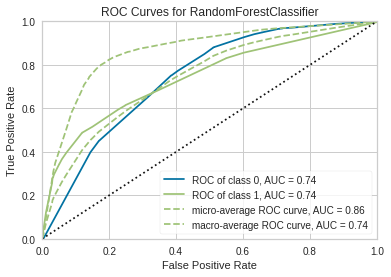

In [18]:
plot_model(tuned_rf, plot = 'auc')

# 10.2 Καμπύλη Precision-Recall

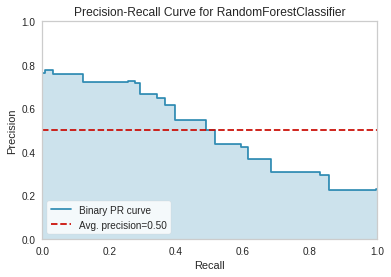

In [19]:
plot_model(tuned_rf, plot = 'pr')

# 10.3 Γράφημα Σπουδαιότητας των Χαρακτηριστικών (Features)

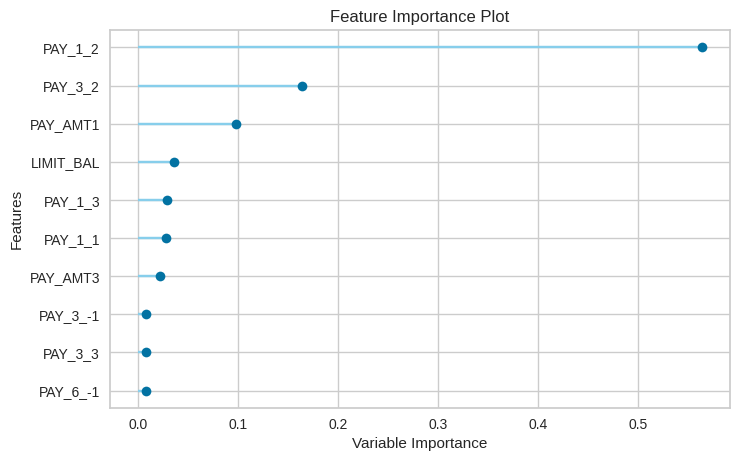

In [20]:
plot_model(tuned_rf, plot='feature')

# 10.4 Confusion Matrix

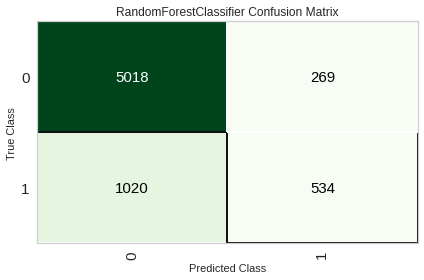

In [21]:
plot_model(tuned_rf, plot = 'confusion_matrix')

*Ένας άλλος τρόπος* ανάλυσης της απόδοσης των μοντέλων γίνεται με τη χρήση της συνάρτησης `evaluate_model()`, η οποία εμφανίζει ένα γραφικό περιβάλλον με όλα τα διαθέσιμα γραφήματα για ένα δεδομένο μοντέλο. Εσωτερικά χρησιμοποιεί τη συνάρτηση `plot_model()`.

In [22]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# 11.0 Προβλέψεις στο Test / Hold-Out Set

Πριν την οριστικοποίηση του μοντέλου, συνιστάται να κάνουμε έναν τελευταίο έλεγχο εξάγοντας τις προβλέψεις από το test/hold-out σετ και εξετάζοντας τις μετρικές αξιολόγησης. Αν ανατρέξετε στον πίνακα με τις πληροφορίες της Ενότητας 6, θα διαπιστώσετε ότι το 30% (6.841 δείγματα) των δεδομένων έχει διαχωριστεί - διαμορφώνοντας το test/hold-out set. Όλα τα αποτελέσματα των παραπάνω μετρικών αξιολόγησης αφορούν μόνο τα δεδομένα εκπαίδευσης (training set), δηλαδή το 70%. Τώρα, θα χρησιμοποιήσουμε το αποθηκευμένο εκπαιδευμένο μοντέλο για κάνουμε προβλέψεις στα δεδομένα που διαχωρίσαμε και να εξάγουμε τα αποτελέσματα των μετρικών αξιολόγησης. Σκοπός είναι να δούμε αν υπάρχει ουσιαστική διαφορά σε σχέση με τα αποτελέσματα από το cross validation.

In [23]:
predict_model(tuned_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8116,0.7407,0.3436,0.6650,0.4531,0.3530,0.3811


Το accuracy στο test/hold-out set είναι **`0.8116`** για το μοντέλο `tuned_rf`. Το αποτέλεσμα της ίδιας μετρικής κάνοντας cross validation ήταν **`0.8203`** (βλέπε Ενότητα 9.3). Αυτή δεν είναι ουσιαστική διαφορά. Αν υπάρχει μεγαλύτερη διακύμανση μεταξύ των αποτελεσμάτων test/hold-out και CV, τότε συνήθως αυτό υπονοεί over-fitting (ΣτΜ: δηλαδή ότι το μοντέλο έχει προσαρμοστεί υπερβολικά στα δεδομένα εκπαίδευσης και δεν μπορεί να γενικεύσει σε άγνωστα δεδομένα), αλλά μπορεί να οφείλεται και σε άλλους παράγοντες που χρήζουν περαιτέρω διερεύνησης. Σε αυτή την περίπτωση, θα προχωρήσουμε παρακάτω οριστικοποιώντας το μοντέλο και εξάγοντας τις προβλέψεις για τα άγνωστα δεδομένα. Δηλαδή, το 5% των δεδομένων που είχαμε διαχωρίσει από την αρχή και δεν τα έχει δει ποτέ η PyCaret.

(Συμβουλή: Είναι πάντα καλή πρακτική να κοιτάμε την τυπική απόκλιση στα αποτελέσματα από του cross validation, όταν χρησιμοποιούμε το `create_model()`.)

# 12.0 Οριστικοποίηση Μοντέλου για Τελική Χρήση.

Η οριστικοποίηση του μοντέλου είναι το τελευταίο βήμα του πειράματος. Μια τυπική ροή εργασιών μηχανικής μάθησης (ML workflow) ξεκινάει με τη συνάρτηση `setup()`, συνεχίζει συγκρίνοντας τα μοντέλα με την `compare_models()`, εκεί προκρίνονται μερικά υποψήφια μοντέλα (βάσει της μετρικής που ενδιαφέρει) και στα οποία εφαρμόζονται διάφορες τεχνικής μοντελοποίησης, όπως η ρύθμιση των υπερ-παραμέτρων, ensembling, stacking κλπ. Τελικά, αυτή η ροή εργασιών θα οδηγήσει στο καλύτερο μοντέλο που θα χρησιμοποιηθεί για να εξαχθούν οι προβλέψεις από νέα και άγνωστα δεδομένα. Η συνάρτηση `finalize_model()` προσαρμόζει το μοντέλο σε ολόκληρο το dataset, συμπεριλαμβανομένου του test/hold-out set (30% σε αυτή την περίπτωση). Ο σκοπός αυτής της συνάρτησης είναι να εκπαιδεύσει το μοντέλο σε ολόκληρο το dataset προτού είναι έτοιμο για τελική χρήση (deployment).

In [24]:
final_rf = finalize_model(tuned_rf)

In [25]:
#Final Random Forest model parameters for deployment
#Οι τελικές παράμετροι του μοντέλου Random Forest,
#που προορίζονται για τελική χρήση.
print(final_rf)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


**Προσοχή:** Μια τελευταία προειδοποίηση! Όταν το μοντέλο οριστικοποιείται με την `finalize_model()`, χρησιμοποιείται ολόκληρο το dataset κατά την εκπαίδευση, συμπεριλαμβανομένου του test/hold-out set. Γι' αυτό το λόγο, αν το μοντέλο χρησιμοποιηθεί για να κάνει προβλέψεις βάσει των δεδομένων του test/hold-out set, τότε τα αποτελέσματα θα είναι παραπλανητικά, καθώς θα προσπαθείτε να εξάγετε προβλέψεις για δεδομένα που έχετε ήδη χρησιμοποιήσει κατά τη μοντελοποίηση. Μόνο και μόνο για να καταδείξουμε αυτό ακριβώς, θα χρησιμοποιήσουμε το `final_rf` με την `predict_model` για να συγκρίνουμε τα αποτελέσματα με αυτά της Ενότητας 11.

In [26]:
predict_model(final_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8184,0.7526,0.3533,0.6985,0.4692,0.3736,0.4053


Παρατηρήστε πως η AUC στο `final_rf` αυξήθηκε σε **`0,7526`** από **`0,7407`**, παρόλο που το μοντέλο παραμένει ίδιο. Αυτό συμβαίνει επειδή το `final_rf` έχει εκπαιδευτεί σε όλα τα δεδομένα, συμπεριλαμβανομένου του test/hold-out set.

# 13.0 Προβλέψεις βάσει Άγνωστων Δεδομένων

Η συνάρτηση `predict_model()` χρησιμοποιείται, επίσης, για την εξαγωγή προβλέψεων βάσει άγνωστων δεδομένων. Η μόνη διαφορά από την Ενότητα 11 είναι ότι, αυτή τη φορά, θα περάσουμε την παράμετρο `data_unseen` στη συνάρτηση. Τη μεταβλητή `data_unseen` την ορίσαμε στην αρχή του μαθήματος και περιέχει το 5% (1.200 δείγματα) του αρχικού dataset, το οποίο δεν έχει εκτεθεί ποτέ στην PyCaret (βλέπε Ενότητα 5 για επεξήγηση).

In [27]:
unseen_predictions = predict_model(final_rf, data=data_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8167,0.7768,0.3612,0.6463,0.4634,0.3634,0.3857


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Label,Score
0,100000,2,2,2,23,0,-1,-1,0,0,...,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0,0,0.8051
1,380000,1,2,2,32,-1,-1,-1,-1,-1,...,11873.0,21540.0,15138.0,24677.0,11851.0,11875.0,8251.0,0,0,0.9121
2,200000,2,2,1,32,-1,-1,-1,-1,2,...,3151.0,5818.0,15.0,9102.0,17.0,3165.0,1395.0,0,0,0.8051
3,200000,1,1,1,53,2,2,2,2,2,...,149531.0,6300.0,5500.0,5500.0,5500.0,5000.0,5000.0,1,1,0.7911
4,240000,1,1,2,41,1,-1,-1,0,0,...,1737.0,2622.0,3301.0,0.0,360.0,1737.0,924.0,0,0,0.9121


 Οι στήλες `Label` και `Score` προστίθενται στο σύνολο δεδομένων `data_unseen`. To Label (Ετικέτα) είναι η πρόβλεψη και το Score είναι η πιθανότητα αυτή της πρόβλεψης. Παρατηρήστε πως τα αποτελέσματα συνενώνονται στο αρχικό dataset, ενώ όλοι οι μετασχηματισμοί εκτελούνται αυτόματα στο υπόβαθρο. Επίσης, μπορείτε να ελέγξετε τις μετρικές αξιολόγησης σε αυτό το dataset, αφού είναι διαθέσιμη η στήλη-στόχος `default` με τις πραγματικές τιμές. Για να το κάνουμε αυτό, θα χρησιμοποιήσουμε το module `pycaret.utils`. Δείτε το παρακάτω παράδειγμα:

In [28]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['default'], unseen_predictions['Label'], metric = 'Accuracy')

0.8167

# 14.0 Αποθήκευση Μοντέλου

Τώρα, έχουμε ολοκληρώσει το πείραμα οριστικοποιώντας το μοντέλο `tuned_rf` που είναι αποθηκευμένο στη μεταβλητή `final_rf`. Επίσης, το χρησιμοποιήσαμε για κάνουμε προβλέψεις βάσει των άγνωστων δεδομένων `data_unseen`. Έτσι, φτάσαμε στο τέλος του πειράματος, αλλά παραμένει μια ερώτηση που πρέπει να απαντηθεί: Τι γίνεται όταν έχεις νέα, περισσότερα δεδομένα για να εξάγεις προβλέψεις; Πρέπει να ξανα-εκτελέσετε το πείραμα από την αρχή; Η απάντηση είναι όχι, η ενσωματωμένη συνάρτηση της PyCaret, `save_model()` σας επιτρέπει να αποθηκεύσετε το μοντέλο μαζί με ολόκληρη τη διαδικασία μετασχηματισμού (transformation pipeline) για μελλοντική χρήση.

In [29]:
save_model(final_rf,'Final RF Model 14Aug2022')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='default',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                         class_weight={}, criterion='entropy',
                                         max_depth=5, max_features=1.0,
                                         max_leaf_

(Συμβουλή: Είναι πάντα καλή πρακτική να αναγράφετε την ημερομηνία στο όνομα του αρχείου όταν αποθηκεύεται μοντέλα - βοηθάει στον έλεγχο της έκδοσης (version control).)

# 15.0 Φόρτωση Αποθηκευμένου Μοντέλου

Για να φορτώσουμε ένα μοντέλο είτε σε κάποιο μεταγενέστερο χρόνο είτε σε κάποιο άλλο περιβάλλον, θα χρησιμοποιήσουμε τη συνάρτηση της Pycaret, `load_model()`. Στη συνέχεια, θα εφαρμόσουμε το μοντέλο σε νέα άγνωστα δεδομένα για να εξάγουμε προβλέψεις.

In [30]:
saved_final_rf = load_model('Final RF Model 14Aug2022')

Transformation Pipeline and Model Successfully Loaded


Όταν φορτώσετε το μοντέλο στο περιβάλλον, μπορείτε με απλό τρόπο να κάνετε προβλέψεις σε νέα δεδομένα χρησιμοποιώντας τη συνάρτηση `predict_model()`. Παρακάτω έχουμε εφαρμόσει το φορτωμένο μοντέλο στα ίδια άγνωστα δεδομένα, `data_unseen`, που χρησιμοποιήσαμε στην Ενότητα 13.

In [31]:
new_prediction = predict_model(saved_final_rf, data=data_unseen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8167,0.7768,0.3612,0.6463,0.4634,0.3634,0.3857


In [32]:
new_prediction.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Label,Score
0,100000,2,2,2,23,0,-1,-1,0,0,...,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0,0,0.8051
1,380000,1,2,2,32,-1,-1,-1,-1,-1,...,11873.0,21540.0,15138.0,24677.0,11851.0,11875.0,8251.0,0,0,0.9121
2,200000,2,2,1,32,-1,-1,-1,-1,2,...,3151.0,5818.0,15.0,9102.0,17.0,3165.0,1395.0,0,0,0.8051
3,200000,1,1,1,53,2,2,2,2,2,...,149531.0,6300.0,5500.0,5500.0,5500.0,5000.0,5000.0,1,1,0.7911
4,240000,1,1,2,41,1,-1,-1,0,0,...,1737.0,2622.0,3301.0,0.0,360.0,1737.0,924.0,0,0,0.9121


Παρατηρήστε ότι τα αποτελέσματα `unseen_predictions` και `new_prediction` είναι πανομοιότυπα.

In [33]:
from pycaret.utils import check_metric
check_metric(new_prediction['default'], new_prediction['Label'], metric = 'Accuracy')

0.8167

# 16.0 Σύνοψη / Επόμενα Βήματα;

Αυτό το μάθημα έχει καλύψει ολόκληρο το pipeline της μηχανικής μάθησης: λήψη δεδομένων, προ-επεξεργασία, εκπαίδευση μοντέλου, ρύθμιση υπερ-παραμέτρων, προβλέψεις και αποθήκευση μοντέλου για μελλοντική χρήση. Ολοκληρώσαμε όλα αυτά τα βήματα με λιγότερες από 10 εντολές, οι οποίες είναι πολύ φυσικά δομημένες και εύκολο να τις θυμόμαστε διαισθητικά, όπως `create_model()`, `tune_model()`, `compare_models()`. Η εκτέλεση του πειράματος από την αρχή, χωρίς να κάνουμε χρήση της PyCaret, θα απαιτούσε περισσότερες από 100 εντολές για την πλειοψηφία των βιβλιοθηκών.

Έχουμε καλύψει μόνο τα βασικά του module `pycaret.classification`. Στα επόμενα μαθήματα θα εμβαθύνουμε στην προηγμένη προ-επεξεργασία, τo ensembling, το γενικευμένο stacking και άλλες τεχνικές που επιτρέπουν την πλήρη εξατομίκευση του pipeline μηχανικής μάθησης και πρέπει να είναι κτήμα κάθε Data Scientist.

Τα λέμε στο επόμενο μάθημα. Ακολουθήστε το σύνδεσμο στο __[Binary Classification Tutorial (CLF102) - Intermediate Level](https://github.com/pycaret/pycaret/blob/master/tutorials/Greek/Binary%20Classification%20Tutorial%20Level%20Intermediate%20-%20CLF102.ipynb)__